In [1]:
import pickle
with open('ROMS_26yr_daydic.pkl', 'rb') as file:
    daydic = pickle.load(file)

with open('ROMS_26yr_eddies.pkl', 'rb') as file:
    eddies = pickle.load(file)

In [2]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

fname = '/srv/scratch/z3533156/26year_BRAN2020/outer_avg_01461.nc'
dataset = nc.Dataset(fname)
lon_rho  = dataset.variables['lon_rho'][:]
lon_rho = np.transpose(lon_rho, axes=(1, 0))
lat_rho  = dataset.variables['lat_rho'][:]
lat_rho = np.transpose(lat_rho, axes=(1, 0))
f  = dataset.variables['f'][:]
f = np.transpose(f, axes=(1, 0))
h = dataset.variables['h'][:]
h = np.transpose(h, axes=(1, 0))
z_r = np.load('/home/z5297792/UNSW-MRes/MRes/z_r/z_r.npy')
z_r = np.transpose(z_r, (1, 2, 0))
temp_ave = np.load('/srv/scratch/z5297792/Climatology/temp_ave.npy')
CurSpeed_ave = np.load('/srv/scratch/z5297792/Climatology/CurSpeed_ave.npy')

In [3]:
with open('/srv/scratch/z5297792/Sample/OW_surf_5yr.pkl', 'rb') as file:
    OW_surf_5yr = pickle.load(file)

# OW_surf_5yr = np.zeros((*lon_rho.shape, 5*12*30))
# t0 = 0
# tN = 29
# for fnumber in range(1461, 1461 + 5*12*30 + 1, 30): #5 years

#     fnumber = str(f"{round(fnumber):05d}")

#     OW_surf_5yr[:,:,t0:tN+1] = np.load(f'/srv/scratch/z5297792/Climatology/ow_and_cur_speeds/ow_{fnumber}.npy')[:,:,0,:].squeeze()
#     t0 += 30
#     tN += 30

# with open('/srv/scratch/z5297792/Sample/OW_surf_5yr.pkl', 'wb') as file:
#     pickle.dump(OW_surf_5yr, file)

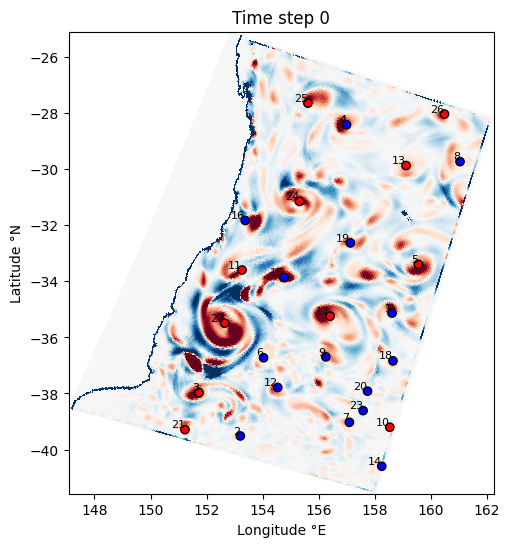

In [4]:
import matplotlib.animation as animation

fig = plt.figure(figsize=(7, 6))

def update(t):
    plt.clf()
    plt.pcolor(lon_rho, lat_rho, OW_surf_5yr[:, :, t], vmin=-1e-9, vmax=1e-9, cmap='RdBu')
    plt.colorbar(r'OW (1/$s^2$)')
    colors = ['r' if v > 0 else 'b' for v in daydic[f'Day{t+1}']['Vort']]
    plt.scatter(daydic[f'Day{t+1}']['Lon'], daydic[f'Day{t+1}']['Lat'], color=colors, edgecolor='black', linewidth=1)
    
    for i, id_value in enumerate(daydic[f'Day{t+1}']['Id']):
        plt.text(daydic[f'Day{t+1}'].iloc[i]['Lon'], daydic[f'Day{t+1}'].iloc[i]['Lat'], str(id_value), fontsize=8, ha='right', va='bottom')
    
    plt.xlabel('Longitude °E')
    plt.ylabel('Latitude °N')
    plt.gca().set_aspect('equal')
    plt.title(f'Time step {t}')

ani = animation.FuncAnimation(fig, update, frames=OW_surf_5yr.shape[-1], repeat=True)

# ani = animation.FuncAnimation(fig, update, frames=20, repeat=True)

ani.save('/srv/scratch/z5297792/Sample/OW_surf_5yr.gif', writer='pillow', fps=2)